In [61]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

In [62]:
# load the dataset
df = pd.read_csv("Recruitment_Data.csv")

In [64]:
df.shape

(446, 4)

In [65]:
#displaying first five rows
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


Here we see four columns:

1. Attrition: Whether the employee has left the company (Yes or No),where 0 represents employees who are still employed and 1 represents employees who have left the company.
2. PerformanceRating: The employee's performance rating (1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding)
3. sales_quota_pct - how much a salesperson sold last year relative to their quota
4. recruiting_source - through which source employees were hired.

In [67]:
#checking for missing values
(df.isnull().sum()/len(df))*100

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     45.964126
dtype: float64

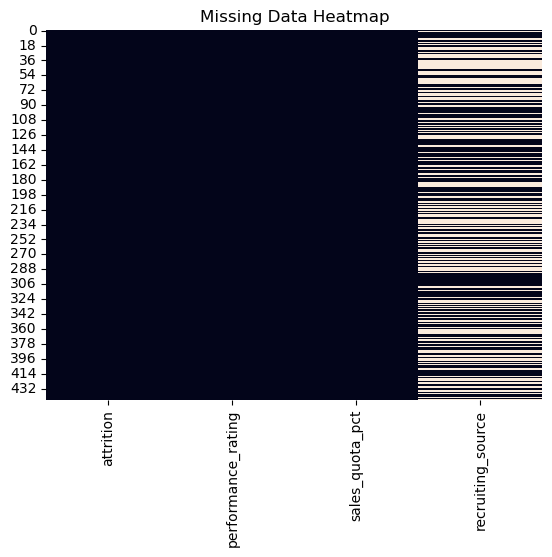

In [68]:
# Plotting missing data heatmap to check for source where there are missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

The heatmap shows that there are missing values in the 'recruiting_source' column, which is indicated by the white bars in that column.

We will create a correlation matrix to find if the missing values are missing at random or not

<AxesSubplot:>

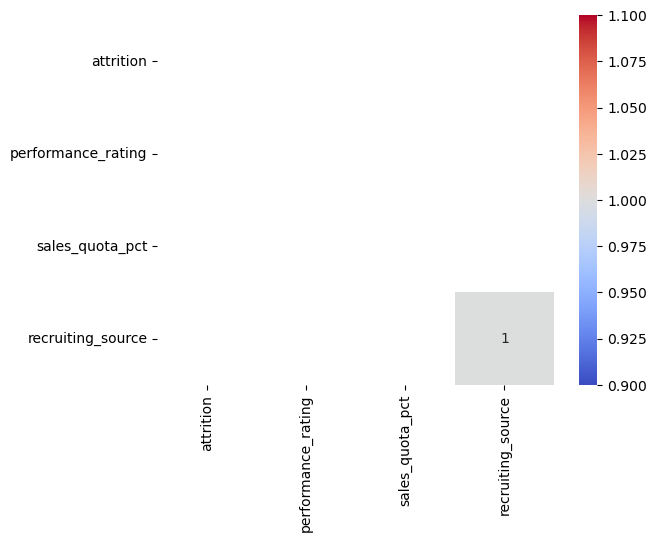

In [69]:
# Creating a correlation matrix of missing data
missing_corr = df.isnull().corr()
# Plotting  correlation matrix using seaborn to visualize the result for better understanding
sns.heatmap(missing_corr, cmap='coolwarm', annot=True)

1. Based on the correlation matrix, it seems that there is no strong correlation between the missing values in recruiting_source and the other variables in the dataset. Therefore, it is reasonable to impute missing values in recruiting_source with methods such as the mode or a predicted values through predictive model.
2. The above graph also confirms that the missing values in the dataset may be completely random and not related to any other variable in the dataset.

As we have around 45 percent of missing valuesin for variable 'recruiting_source', we will use predictive model to predict  the missing values and impute it.

In [70]:
# splitting the dataset into train and test sets
train_df = df[df['recruiting_source'].notnull()]#Dataframe with no null values for training set
test_df = df[df['recruiting_source'].isnull()]#Dataframe with null values for test set

In [71]:
# select the features to use for the model
features = ['attrition', 'performance_rating', 'sales_quota_pct']

In [72]:
# creating the model
#Initializing a random forest classifier model with 100 decision trees (i.e. estimators) 
#as the ensemble method for classification.
clf = RandomForestClassifier(n_estimators=100)

In [73]:
# fit the model on the training set
clf.fit(train_df[features], train_df['recruiting_source'])

RandomForestClassifier()

In [74]:
# predicting the missing values in the test set
predicted_recruiting_source = clf.predict(test_df[features])

This fits the Random Forest Classifier model clf on the training data train_df with the specified input features (features) and the target variable (recruiting_source). The model will be trained to predict the missing values of the recruiting_source variable based on the other variables in the dataset.

In [75]:
# filling the missing values in the original dataset with the predicted values
df.loc[df['recruiting_source'].isnull(), 'recruiting_source'] = predicted_recruiting_source

In [76]:
#checking for null values after imputing them with predicted values from predictive model
df.isnull().sum()

attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64

In [77]:
#Let's check for duplicates first
df.duplicated().sum()
#there are no duplicates

0

Now we have dealt with missing values let's Analyse the recruitment data set for finding best source of recruitement

let's create categorical and continuous columns for better understanding

In [78]:
cat_cols=['attrition','performance_rating','recruiting_source']
cont_cols=['sales_quota_pct']

### Let's perform Univariate analysis on each variable to find out their overall distribution in the dataframe.

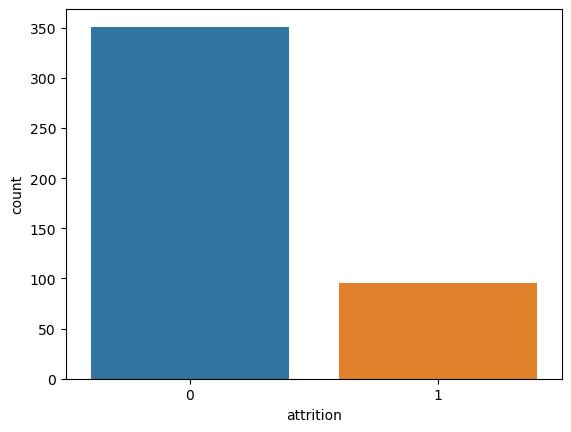

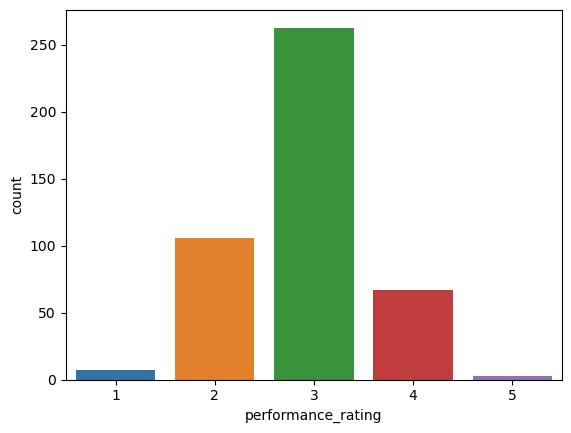

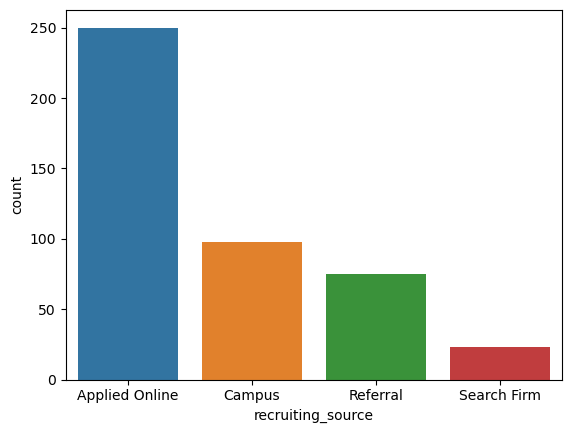

In [79]:
#plotting countplot for the categorical columns
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()

#plotting countplot for the continuous columns i.e sales_quota_pct
sns.boxplot(df['sales_quota_pct'])
plt.show()

Inferences from Univariate Analysis:
1. Employees leaving the company is around 21 percent of the total workforce.
2. The average performance rating of an Employee is 3.
3. Most of recruitments are done through Online application,least being from search firm
4. Most average sales quota is around 1, with small percentage of employees outperforming which shows as outliers.

### Let's perform Bivariate analysis to understand relationship between two variables so that we can identify patterns, correlations, and dependencies between the two variables. 

We will use group by function to find the best recruiting source w.r.t to average Sales Number and average Attrition Number
The goal of this is to find out recruiting source with low attrition rates and high sales average.

In [80]:
#Average sales number grouped by Recruiting Source
df.groupby("recruiting_source").agg(
    
    avg_sales = ("sales_quota_pct", "mean")
)

,avg_sales
recruiting_source,
Applied Online,1.180877
Campus,0.905867
Referral,1.010400
Search Firm,1.002976


From above calcultion we can following assumptions:
1. Individuals recruited through Online applications have the highest average sales and second highest being the Referrals

In [81]:
#Average attrition Number grouped by Recruiting Source
df.groupby("recruiting_source").agg(
    
    avg_attrition = ("attrition", "mean")
)

,avg_attrition
recruiting_source,
Applied Online,0.184000
Campus,0.214286
Referral,0.240000
Search Firm,0.434783


From above calcultion we can following assumptions:
1. Search Firm recruiting source has the highest average attrition number which indicates that individuals recruited through this source have the highest chance of leaving the company and Recruited through Referrel being the second highest for high attrition number.
2. Individuals recruited through online applications having the least attrition rate confirming that people recruited through Online have the highest chances of staying at the company and Campus being the second for average low attrition numbers.

#### Visualizing Attrition differences by Recruiting Source through plotting a barplot which illustrates Attrition numbers by the Recruiting Source.

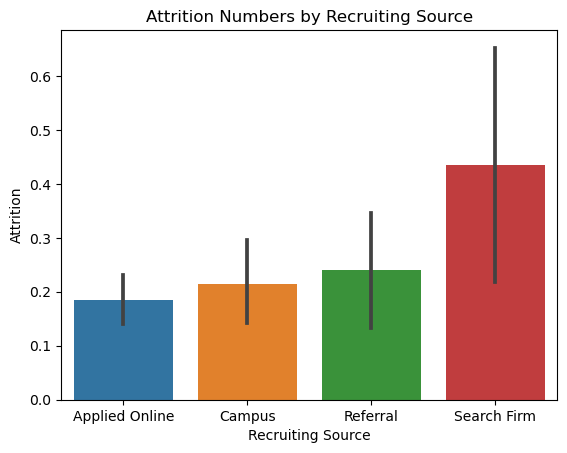

In [82]:
# Creating a bar plot
sns.barplot(x='recruiting_source', y='attrition', data=df)
# Adding labels and title
plt.xlabel('Recruiting Source')
plt.ylabel('Attrition')
plt.title('Attrition Numbers by Recruiting Source')
plt.show()

Inferences from the graph:
1. The attrition rate is highest for the "Search Firm" recruiting source, followed by "Referral" and "Campus".
2. The "Applied Online" recruiting source has the lowest attrition rate among all the sources.

#### Visualizing Sales differences by Recruiting Source through Plotting a barplot that illustrates Sales numbers by the Recruiting Source. 

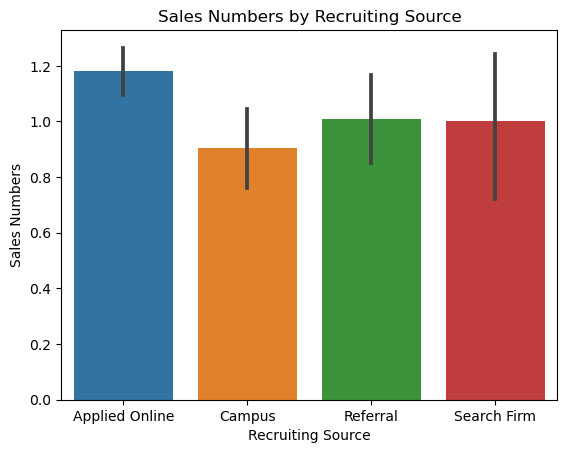

In [83]:
# Creating a bar plot where x is recruiting source and y is sales_quota_pct
sns.barplot(x='recruiting_source', y='sales_quota_pct', data=df)
# Adding labels and title
plt.xlabel('Recruiting Source')
plt.ylabel('Sales Numbers')
plt.title('Sales Numbers by Recruiting Source')
plt.show()

Inferences from graph:
1. The sales numbers are highest for the "Applied Online" recruiting source, followed by "Referral".
2. he "Search Firm" recruiting source has the lowest sales numbers among all the sources.
3. The "Campus" recruiting source has moderate sales numbers compared to other sources.

<AxesSubplot:xlabel='attrition', ylabel='sales_quota_pct'>

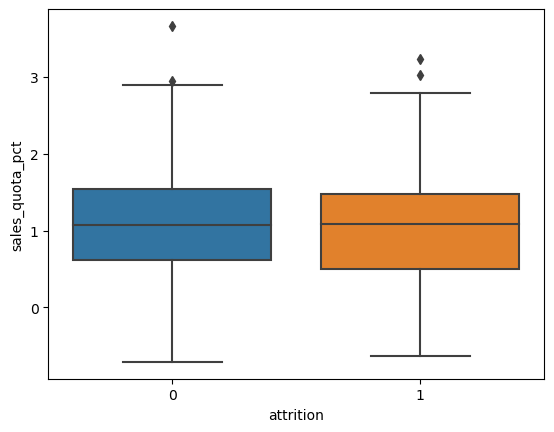

In [84]:
#plotting attrition vs sales_quota_pct
sns.boxplot(x='attrition', y='sales_quota_pct', data=df)

Inferences from graph:
1. The median sales quota is slightly higher for employees without attrition compared to employees with attrition.
2. The interquartile range (IQR) for sales quota is higher for employees without attrition, indicating a larger spread of sales performance among these employees.
3. There are some outliers present in both categories, suggesting the presence of exceptional sales performers or underperformers in the dataset.

<AxesSubplot:xlabel='attrition', ylabel='count'>

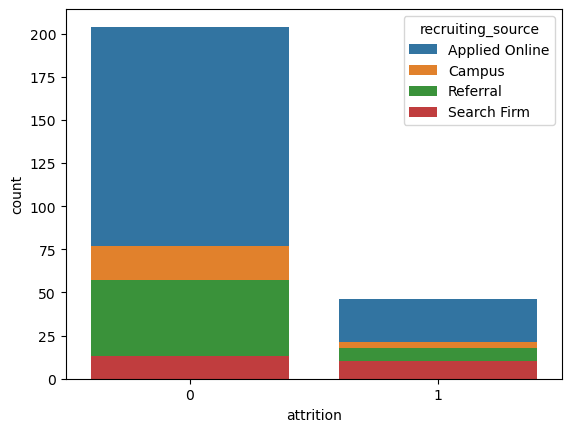

In [85]:
#plotting attrition vs recruitment source
sns.countplot(x='attrition', hue='recruiting_source', data=df, dodge=False)

Inferences from the graph:
1. The majority of employees in the dataset were recruited through the "Applied Online" and "Referral" sources, regardless of attrition status. These two sources have the highest counts in both the attrition (0 and 1) categories.
2. The "Search Firm" source has the lowest count in both attrition categories, indicating that fewer employees were recruited through this source.
3. The "Campus" source has a slightly higher count in the non-attrition category, indicating that employees recruited from campus placements are less likely to leave the company.

<AxesSubplot:xlabel='recruiting_source', ylabel='count'>

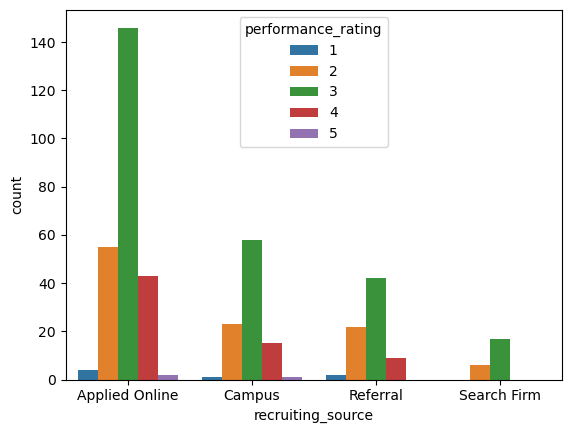

In [86]:
#plotting 'recruitment source' vs 'performance_rating'
sns.countplot(x='recruiting_source', hue='performance_rating', data=df)

Inferences from the graph:
1. The majority of employees in the dataset were recruited through the "Applied Online" source, across all performance ratings. This source has the highest count in each performance rating category.
2. The "Campus" source has a higher count in the "Good" and "Excellent" performance rating categories compared to other sources.   This suggests that campus recruitment tends to attract candidates with higher performance ratings.
3. The "Search Firm" source has a relatively lower count in all performance rating categories, indicating that this source may not be as effective in attracting high-performing candidates.

<AxesSubplot:xlabel='attrition', ylabel='count'>

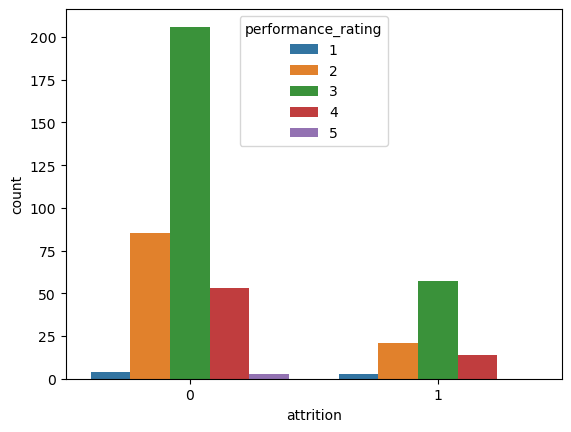

In [87]:
#plotting 'attrition' vs 'performance_rating'
sns.countplot(x='attrition', hue='performance_rating', data=df)

Inferences from the graph:
1. Most employees in the dataset have a performance rating of 3 regardless of attrition status.
2. Employees with a performance rating of 2 have a higher count in the attrition category compared to the non-attrition category. This suggests that employees with a lower performance rating are more likely to experience attrition.
3. Employees with a performance rating of 4 have a higher count in the non-attrition category, indicating that employees with an above average performance rating are less likely to leave the company.
4. Employees with a performance rating of 1 (Lowest) and 5 (Highest) have relatively lower counts overall, suggesting that there are fewer employees with these extreme performance ratings in the dataset.
It indicates that employees with lower performance ratings (2) are more prone to attrition, while employees with higher performance ratings (4) are less likely to leave the company.

### After analysing and visualizing the data set we can conclude that:
1. Recruiting through Online Applications has many benefits, as they have low attrition rates, a performance rating of 3 and also have the highest average sales number.
2. Individuals recruited through referrals are also a good option as they have relatively high sales numbers.
3. Campus selections can be a promising option. Candidates recruited from campuses show low attrition rates, similar to those sourced through online applications.
4. Search firms, on the other hand, show the highest attrition rates and relatively lower performance ratings. This indicates that relying heavily on search firms for recruitment may not be beneficial for the company.
5. Additionally, it is crucial to focus on improving the work environment and providing employee benefits. This is particularly important for employees with an average performance rating, as they are at a higher risk of leaving the company.